In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns


In [8]:
df = pd.read_csv(r"C:\Users\omare\Downloads\archive (9)\train.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [99]:
df.shape

(9800, 20)

In [15]:
# changing the data type of 'Postal Code' to integer
df['Postal Code'] = df['Postal Code'].astype(int)

In [16]:
df['Postal Code'].dtype

dtype('int32')

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [11]:
# detecting missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [14]:
#filling missing values
df['Postal Code'].fillna(0, inplace=True)

In [18]:
# detcting duplicate values
df.duplicated().sum()
if df.duplicated().sum() > 0: 
    df.drop_duplicates(inplace=True)    
else:
    print("No duplicate values found.")

No duplicate values found.


In [19]:
3 # type of the customer
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

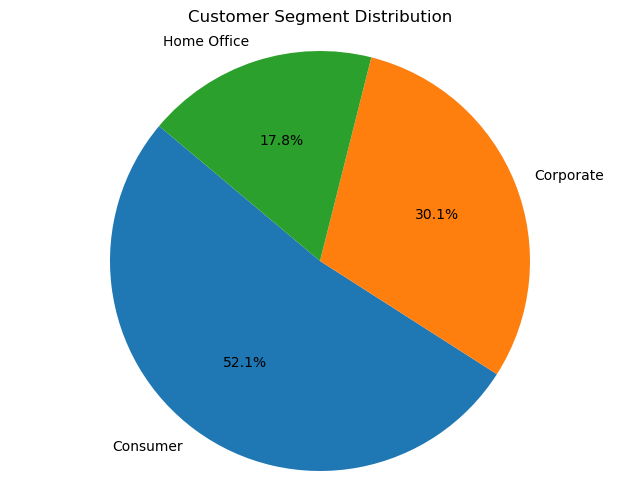

In [22]:
# make pie shart of the type of the customer
plt.figure(figsize=(8, 6))
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Customer Segment Distribution')    
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [25]:
# sales per customer segment
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.sort_values(by='Sales', ascending=False)
print(sales_per_segment)

       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


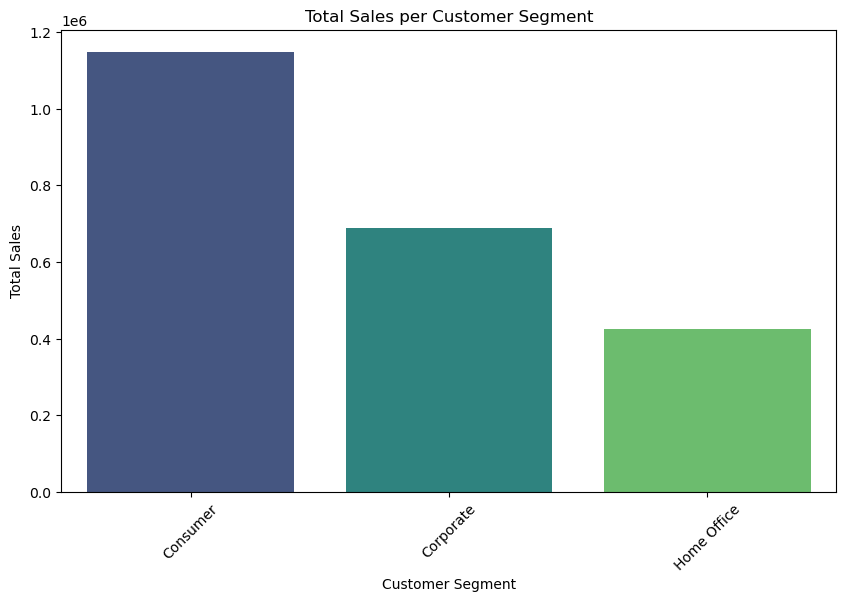

In [27]:
# bar chart of sales per customer segment
plt.figure(figsize=(10, 6))   
sns.barplot(x='Segment', y='Sales', data=sales_per_segment, palette='viridis')
plt.title('Total Sales per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales') 
plt.xticks(rotation=45)
plt.show()  

In [28]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [30]:
# most sold products
most_sold_products = df.groupby('Product Name')['Sales'].sum().reset_index()  
most_sold_products = most_sold_products.sort_values(by='Sales', ascending=False).head(10)
print(most_sold_products)

                                          Product Name      Sales
404              Canon imageCLASS 2200 Advanced Copier  61599.824
649  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480
785       HON 5400 Series Task Chairs for Big and Tall  21870.576
685         GBC DocuBind TL300 Electric Binding System  19823.479
687   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
804               Hewlett Packard LaserJet 3310 Copier  18839.686
786  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
682          GBC DocuBind P400 Electric Binding System  17965.068
812        High Speed Automatic Electric Letter Opener  17030.312


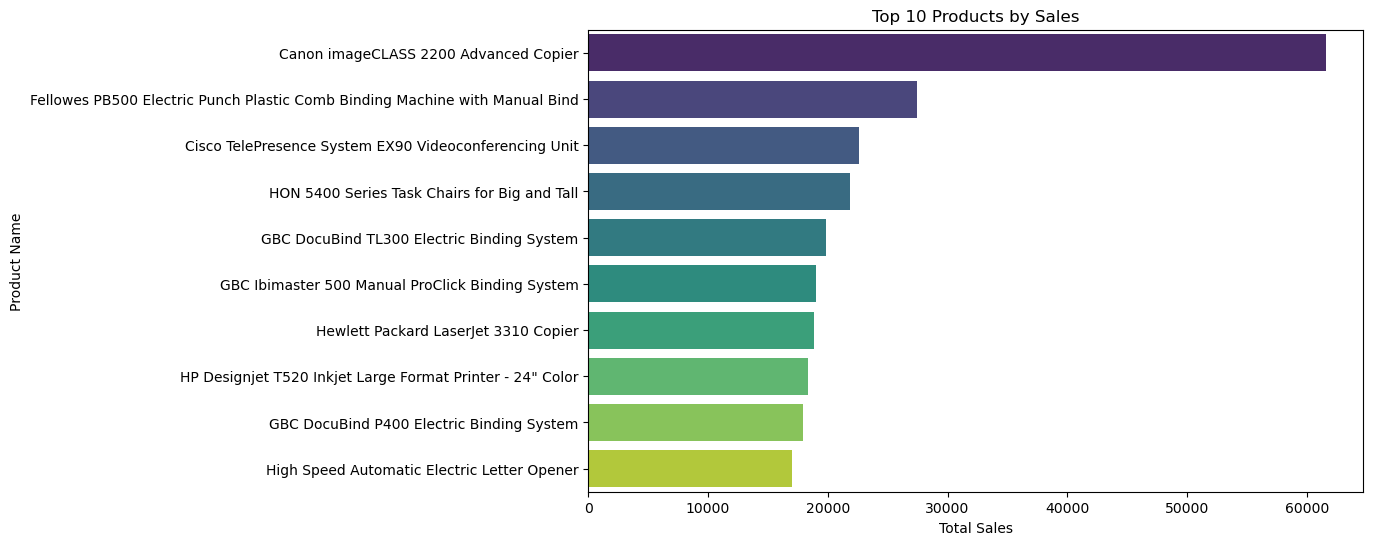

In [100]:
# top products bar
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6)) 
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


In [ ]:
# ranking customers by sales
customer_sales = df.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index() 
customer_sales = customer_sales.sort_values(by='Sales', ascending=False)
print(customer_sales.head(10))

    Customer ID       Customer Name      Sales
700    SM-20320         Sean Miller  25043.050
741    TC-20980        Tamara Chand  19052.218
621    RB-19360        Raymond Buch  15117.339
730    TA-21385        Tom Ashbrook  14595.620
6      AB-10105       Adrian Barton  14473.571
434    KL-16645        Ken Lonsdale  14175.229
669    SC-20095        Sanjit Chand  14142.334
327    HL-15040        Hunter Lopez  12873.298
683    SE-20110        Sanjit Engle  12209.438
131    CC-12370  Christopher Conant  12129.072


In [37]:
df.head()  # Display the first few rows of the modified DataFrame

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [40]:
# mode of shipping methods
shipping_methods = df['Ship Mode'].value_counts()
print(shipping_methods)

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


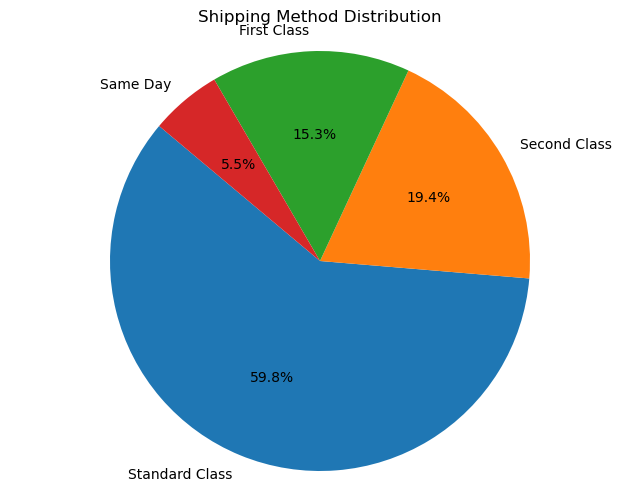

In [42]:
# make pie shart to the shipping methods
plt.figure(figsize=(8, 6))
plt.pie(shipping_methods, labels=shipping_methods.index, autopct='%1.1f%%', startangle=140) 
plt.title('Shipping Method Distribution') 
plt.axis('equal')  
plt.show()


geographical analysis

In [43]:
df.head()  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [46]:
df['Region'].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [48]:
df['State'].value_counts()  

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

In [50]:
# sales per state
sales_per_state = df.groupby('State')['Sales'].sum().reset_index()
sales_per_state = sales_per_state.sort_values(by='Sales', ascending=False)
print(sales_per_state)

                   State        Sales
3             California  446306.4635
30              New York  306361.1470
41                 Texas  168572.5322
45            Washington  135206.8500
36          Pennsylvania  116276.6500
8                Florida   88436.5320
11              Illinois   79236.5170
20              Michigan   76136.0740
33                  Ohio   75130.3500
44              Virginia   70636.7200
31        North Carolina   55165.9640
12               Indiana   48718.4000
9                Georgia   48219.1100
15              Kentucky   36458.3900
1                Arizona   35272.6570
28            New Jersey   34610.9720
4               Colorado   31841.5980
47             Wisconsin   31173.4300
40             Tennessee   30661.8730
21             Minnesota   29863.1500
19         Massachusetts   28634.4340
6               Delaware   27322.9990
18              Maryland   23705.5230
37          Rhode Island   22525.0260
23              Missouri   22205.1500
34          

In [102]:
# Grouping the data by 'Category' and 'Sub-Category' to count unique values in each group.
category_subcategory = df.groupby(['Category', 'Sub-Category']).size().reset_index(name='Order Count')

# Sorting sub-categories by number of orders (descending)
category_subcategory = category_subcategory.sort_values(by='Order Count', ascending=False)

print(category_subcategory)


           Category Sub-Category  Order Count
6   Office Supplies      Binders         1492
10  Office Supplies        Paper         1338
2         Furniture  Furnishings          931
16       Technology       Phones          876
11  Office Supplies      Storage          832
5   Office Supplies          Art          785
13       Technology  Accessories          756
1         Furniture       Chairs          607
4   Office Supplies   Appliances          459
9   Office Supplies       Labels          357
3         Furniture       Tables          314
7   Office Supplies    Envelopes          248
0         Furniture    Bookcases          226
8   Office Supplies    Fasteners          214
12  Office Supplies     Supplies          184
15       Technology     Machines          115
14       Technology      Copiers           66


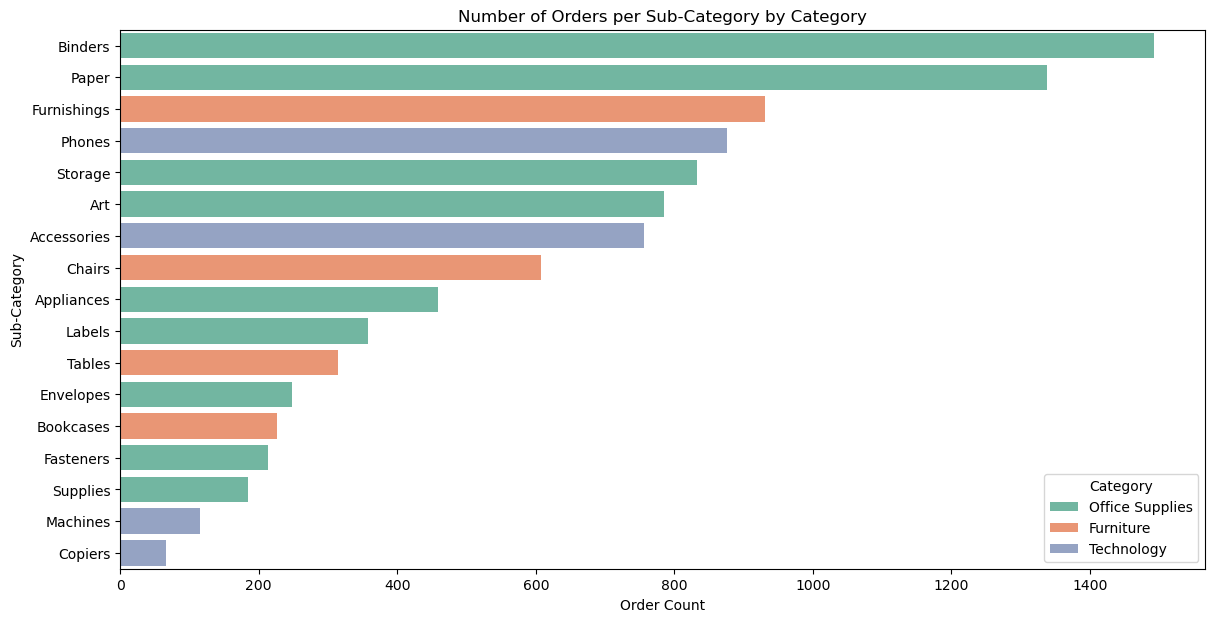

In [103]:
plt.figure(figsize=(14,7))
sns.barplot(data=category_subcategory, x='Order Count', y='Sub-Category', hue='Category', dodge=False, palette='Set2')
plt.title('Number of Orders per Sub-Category by Category')
plt.xlabel('Order Count')
plt.ylabel('Sub-Category')
plt.show()

In [62]:
# order processing time
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [67]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True) 
df["Processing Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
df.head() 


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Processing Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [69]:
df['Processing Time'].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Processing Time, dtype: float64

In [72]:
# 6. Cumulative Sales
cumulative_sales = df.groupby('Order Date')['Sales'].sum().cumsum().reset_index()
print(cumulative_sales)

     Order Date         Sales
0    2015-01-03  1.644800e+01
1    2015-01-04  3.045080e+02
2    2015-01-05  3.240440e+02
3    2015-01-06  4.731144e+03
4    2015-01-07  4.818302e+03
...         ...           ...
1225 2018-12-26  2.256072e+06
1226 2018-12-27  2.256250e+06
1227 2018-12-28  2.257907e+06
1228 2018-12-29  2.260823e+06
1229 2018-12-30  2.261537e+06

[1230 rows x 2 columns]


In [73]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Processing Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3


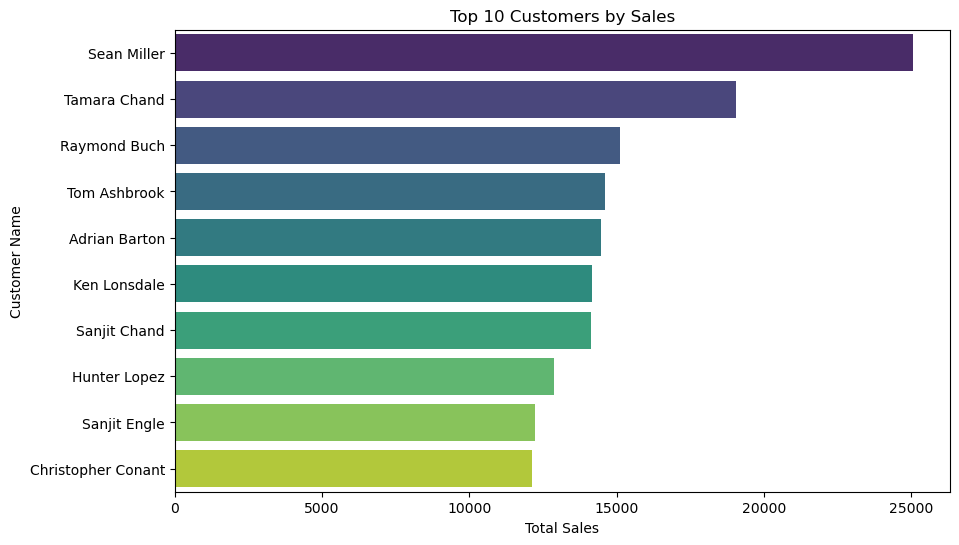

In [77]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

In [89]:
#make month columns
df['Order Month'] = df['Order Date'].dt.month

df["Order Month"].head()


0    11
1    11
2     6
3    10
4    10
Name: Order Month, dtype: int32

In [104]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Processing Time,Order Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,10


In [97]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

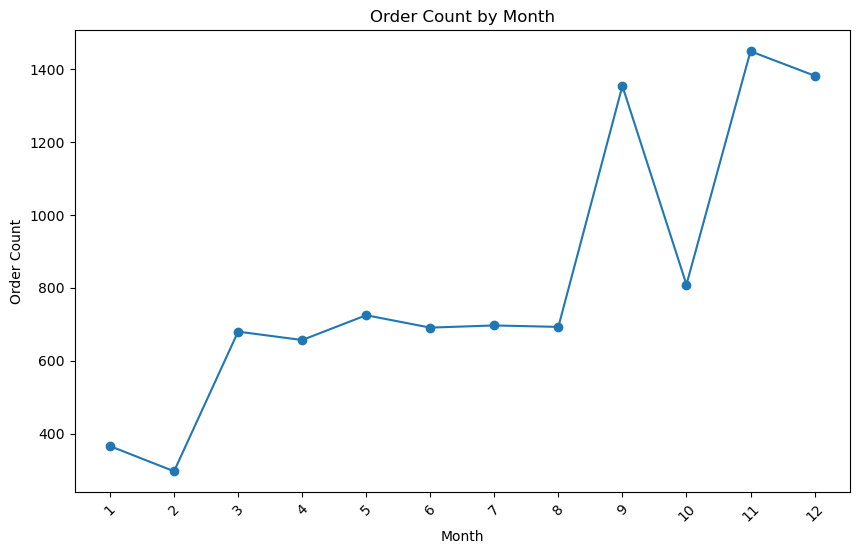

In [93]:
# plot order month
plt.figure(figsize=(10, 6))
plt.plot(df['Order Month'].value_counts().sort_index(), marker='o')
plt.title('Order Count by Month')
plt.xlabel('Month')
plt.ylabel('Order Count') 
plt.xticks(range(1, 13), rotation=45)
plt.show()

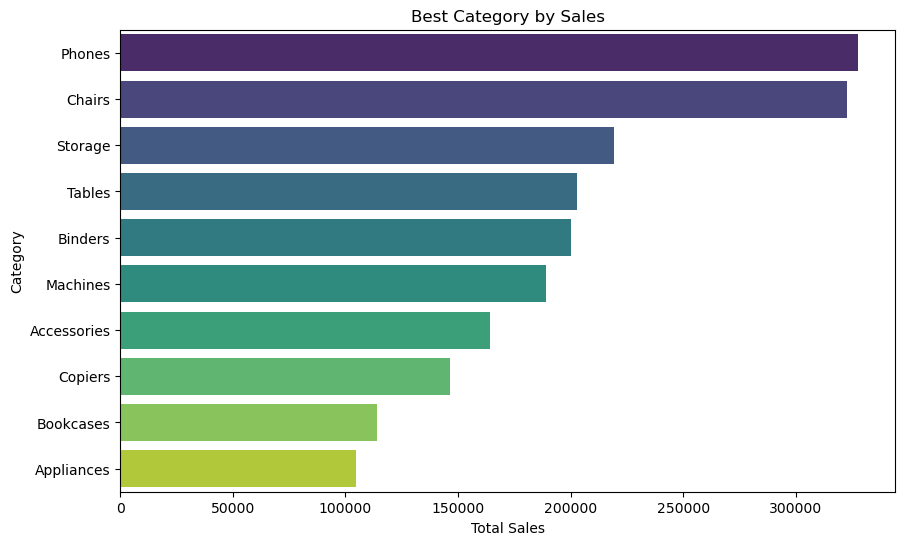

In [105]:
# ploting the best category in sales
best_category = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6)) 
sns.barplot(x=best_category.values, y=best_category.index, palette='viridis')
plt.title('Best Category by Sales') 
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()